# IMPORTING_LIBRARY

In [1]:
!pip install imblearn

In [2]:
!pip install catboost


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, ParameterGrid 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, fbeta_score, make_scorer, f1_score, recall_score,accuracy_score,precision_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from collections import Counter
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from scipy.stats.mstats import winsorize

#  DATA_EXTRACTION AND FEATURE_ENGINEERING

In [91]:
data = pd.read_csv("Datasets_final/train_dataset_final1.csv", index_col=False)
sub_data = pd.read_csv("Datasets_final/validate_dataset_final.csv", index_col=False)

In [92]:
data.head(10)

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
5,5022,1,1,1,80000,35.0,-1,2,-1,-1,...,3294.93,0.03,3722.62,890.98,661.97,3294.84,1087.51,1946.50,0.83,0
6,5023,1,0,2,200000,37.0,-1,-1,0,-1,...,10712.01,19312.98,9455.13,15306.21,7055.30,10700.16,12388.83,15185.33,0.81,0
7,5024,3,1,2,50000,24.0,0,0,0,0,...,5651.27,1600.15,6207.28,1464.87,2199.89,1000.26,3000.16,21055.33,0.12,0
8,5025,1,1,3,50000,44.0,0,0,0,0,...,9001.04,1761.95,2311.19,2200.21,176.18,180.19,9769.14,35039.67,0.08,0
9,5026,2,1,1,440000,NaN,0,-1,-1,-2,...,11350.05,8998.93,0.00,0.00,10960.93,502.87,448.09,9569.17,0.36,0


In [93]:
sub_data.head(10)

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23
5,6,2,1,3,180000,52,0,0,0,0,...,134939.13,135815.03,5902.22,7692.94,5464.25,4892.92,5094.95,4862.26,156799.50,0.04
6,7,1,0,2,50000,36,0,0,0,0,...,48913.93,50441.36,1814.98,2305.94,1999.92,2000.05,2499.93,1700.21,48932.83,0.04
7,8,2,1,2,120000,23,0,0,0,0,...,4305.45,5128.68,2300.02,1199.89,999.83,1000.07,888.05,59999.64,21541.50,0.51
8,9,1,1,2,160000,42,0,0,0,0,...,35697.19,37122.86,2999.71,4999.86,2999.68,2000.06,1999.69,1999.98,31974.50,0.09
9,10,2,0,1,70000,31,0,0,0,0,...,64694.26,67905.69,6000.06,4999.94,10000.12,3000.37,5000.00,3000.12,58702.33,0.09


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [95]:
data.drop("Customer_ID",axis=1, inplace=True)

In [96]:
for col in data.columns:
    print('***********************************************************')
    print('Insights of: ', col)
    print('-----------------------------------------------------------')
    print('Description of data')
    print(data[col].describe())
    print('-----------------------------------------------------------')
    print('Unique Values and Value Count of data')
    print(data[col].unique())
    print(data[col].value_counts())
    print("***********************************************************")


***********************************************************
Insights of:  marriage
-----------------------------------------------------------
Description of data
count    25247.000000
mean         1.551907
std          0.522629
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: marriage, dtype: float64
-----------------------------------------------------------
Unique Values and Value Count of data
[2 1 3 0]
marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64
***********************************************************
***********************************************************
Insights of:  sex
-----------------------------------------------------------
Description of data
count    25247.000000
mean         0.604111
std          0.489050
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sex, dtype: float64
-----------------------

In [97]:
pd.DataFrame(data.isna().sum()).rename(columns={0:"num_of_null_values"})

,num_of_null_values
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0
pay_5,0


In [98]:
sub_data.isna().sum()

Customer_ID          0
marriage             0
sex                  0
education            0
LIMIT_BAL            0
age                  0
pay_0                0
pay_2                0
pay_3                0
pay_4                0
pay_5                0
pay_6                0
Bill_amt1            0
Bill_amt2            0
Bill_amt3            0
Bill_amt4            0
Bill_amt5            0
Bill_amt6            0
pay_amt1             0
pay_amt2             0
pay_amt3             0
pay_amt4             0
pay_amt5             0
pay_amt6             0
AVG_Bill_amt         0
PAY_TO_BILL_ratio    0
dtype: int64

In [99]:
data["age"].fillna(value=data["age"].median(), inplace=True)

In [100]:
new_data = data.copy()

In [101]:
new_data['repayment_ratio'] = new_data[[f'pay_amt{i}' for i in range(1, 7)]].sum(axis=1) / \
                          (new_data[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1) + 1)  # +1 to avoid division by zero

sub_data['repayment_ratio'] = data[[f'pay_amt{i}' for i in range(1, 7)]].sum(axis=1) / \
                          (data[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1) + 1)  #  +1 to avoid division by zero

In [102]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
new_data['num_late_months'] = new_data[pay_cols].apply(lambda row: sum(row > 0), axis=1)
new_data['max_delay'] = new_data[pay_cols].max(axis=1)
new_data['avg_delay'] = new_data[pay_cols].apply(lambda row: row[row > 0].mean() if any(row > 0) else 0, axis=1)


In [103]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
sub_data['num_late_months'] = sub_data[pay_cols].apply(lambda row: sum(row > 0), axis=1)
sub_data['max_delay'] = sub_data[pay_cols].max(axis=1)
sub_data['avg_delay'] = sub_data[pay_cols].apply(lambda row: row[row > 0].mean() if any(row > 0) else 0, axis=1)


In [104]:
pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]
new_data['repayment_consistency'] = new_data[pay_amt_cols].apply(lambda row: sum(row > 0) / 6, axis=1)


In [105]:
pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]
sub_data['repayment_consistency'] = sub_data[pay_amt_cols].apply(lambda row: sum(row > 0) / 6, axis=1)

In [106]:
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
avg_bill_amt = new_data[bill_cols].mean(axis=1)
new_data['utilization_ratio'] = avg_bill_amt/ (new_data['LIMIT_BAL'] + 1)


In [107]:
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
avg_bill_amt = sub_data[bill_cols].mean(axis=1)
sub_data['utilization_ratio'] = avg_bill_amt/ (sub_data['LIMIT_BAL'] + 1)

In [108]:
def longest_streak(row):
    count = streak = 0
    for val in row:
        if val > 0:
            count += 1
            streak = max(streak, count)
        else:
            count = 0
    return streak

new_data['delinquency_streak'] = new_data[pay_cols].apply(longest_streak, axis=1)
sub_data['delinquency_streak'] = sub_data[pay_cols].apply(longest_streak, axis=1)


In [109]:
new_data['utilization_maxdelay_mult'] = new_data['utilization_ratio'] * new_data['max_delay']
sub_data['utilization_maxdelay_mult'] = sub_data['utilization_ratio'] * sub_data['max_delay']

In [110]:
data.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63.0,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [111]:
new_data.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,PAY_TO_BILL_ratio,next_month_default,repayment_ratio,num_late_months,max_delay,avg_delay,repayment_consistency,utilization_ratio,delinquency_streak,utilization_maxdelay_mult
0,2,0,2,60000,25.0,2,2,2,0,0,...,0.03,0,0.031947,3,2,2.0,0.833333,0.691847,3,1.383694
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,0.27,0,0.266246,0,0,0.0,0.500000,0.008742,0,0.000000
2,1,0,2,180000,63.0,0,0,0,0,0,...,0.04,0,0.039850,0,0,0.0,1.000000,0.280119,0,0.000000
3,1,1,2,210000,43.0,0,0,0,0,0,...,0.04,0,0.035660,0,0,0.0,1.000000,0.410616,0,0.000000
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,0.72,0,0.723892,0,-2,0.0,1.000000,0.042194,0,-0.084387


In [112]:
invalid_rows = new_data[(new_data['marriage'] == 0) & (new_data['education'].isin([0, 5, 6]))]
print(invalid_rows.shape)

(0, 34)


In [113]:
new_data = new_data[~((new_data['marriage'] == 0) & (new_data['education'].isin([0, 5, 6])))]


In [114]:
sub_data = sub_data[~((sub_data['marriage'] == 0) & (sub_data['education'].isin([0, 5, 6])))]

In [115]:
new_data.shape

(25247, 34)

In [116]:
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
scaler = StandardScaler()
bill_scaled = scaler.fit_transform(new_data[bill_cols])

pca = PCA(n_components=1) 
new_data['BILL_PCA1'] = pca.fit_transform(bill_scaled)

In [117]:
bill_scaled = scaler.transform(sub_data[bill_cols])
sub_data['BILL_PCA1'] = pca.fit_transform(bill_scaled)

# EDA

## UNIVARAITE ANALYSIS

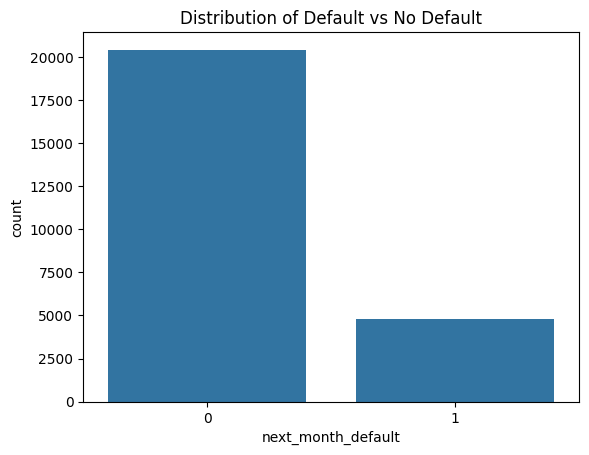

next_month_default
0    0.809601
1    0.190399
Name: proportion, dtype: float64

In [29]:
sns.countplot(x='next_month_default', data=new_data)
plt.title("Distribution of Default vs No Default")
plt.show()

new_data['next_month_default'].value_counts(normalize=True)


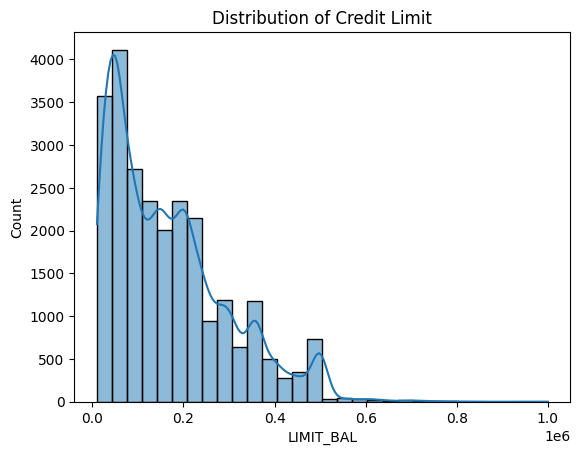

In [30]:
sns.histplot(new_data['LIMIT_BAL'], kde=True, bins=30)
plt.title("Distribution of Credit Limit")
plt.show()


Right-skewed distribution.

Most customers have credit limits between ₹50,000 to ₹300,000.

Outliers exist up to ₹1,000,000 — could explore limiting or log-scaling.

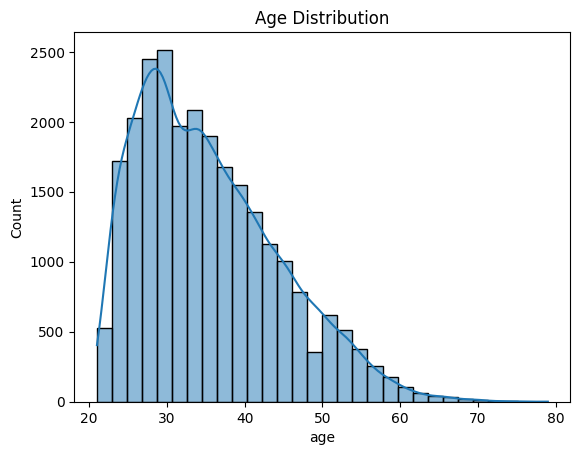

In [31]:
sns.histplot(new_data['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()


Majority customers are in the age group of 25–45 years.

Few very old customers; may be less relevant to default prediction

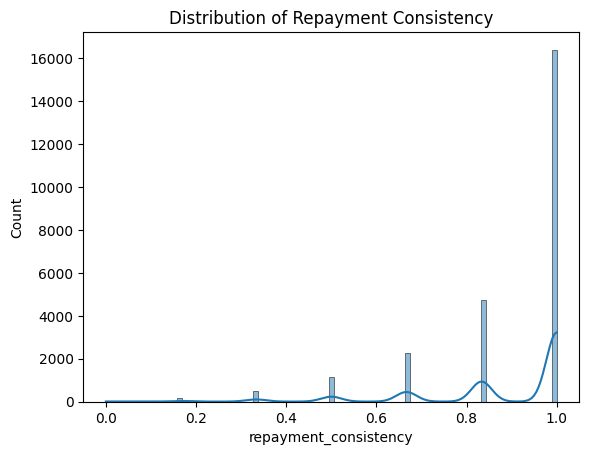

In [32]:
sns.histplot(new_data['repayment_consistency'], kde=True)
plt.title("Distribution of Repayment Consistency")
plt.show()


Bimodal distribution — some always pay on time (1.0), others vary.

Low consistency values might be strong predictors of default.



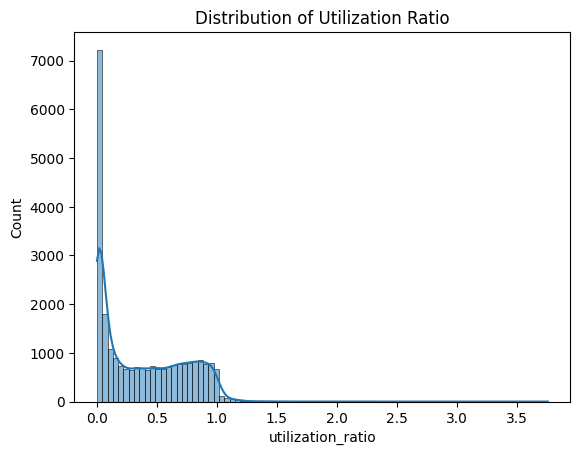

In [33]:
sns.histplot(new_data['utilization_ratio'], kde=True)
plt.title("Distribution of Utilization Ratio")
plt.show()


Some customers are consistently using high % of their limits.

High utilization is known to correlate with financial stress → risk of default.



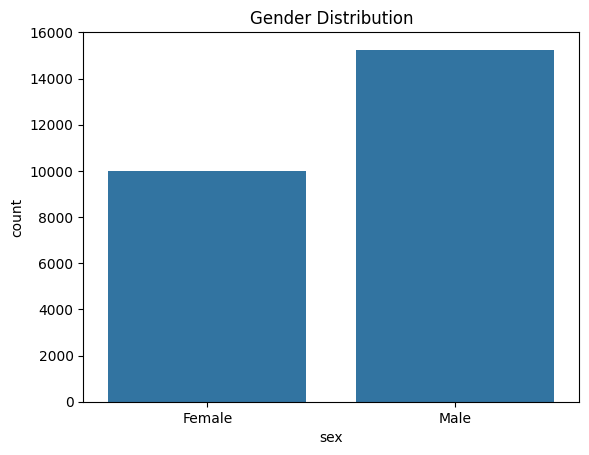

In [34]:
sns.countplot(x='sex', data=new_data)
plt.title("Gender Distribution")
plt.xticks([0,1], ['Female', 'Male'])
plt.show()


Slightly more male customers.

Default rates may not differ significantly by gender, but worth testing.

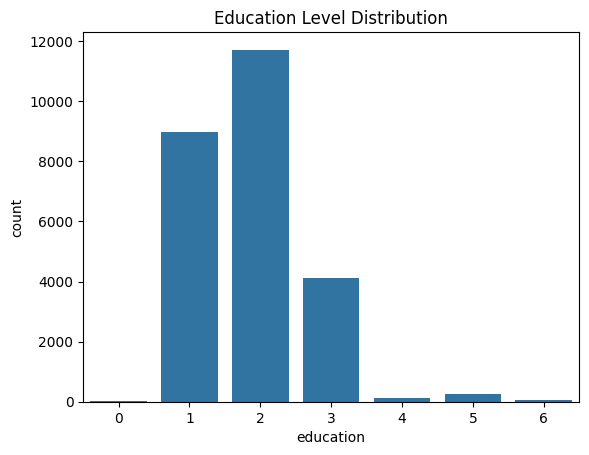

In [35]:
sns.countplot(x='education', data=new_data)
plt.title("Education Level Distribution")
plt.show()


Most customers fall under levels 1–3.

Levels 5, 6 may be invalid or unknown categories → clean or merge if needed.



## BIVARIATE/MULTIVARIATE ANALYSIS

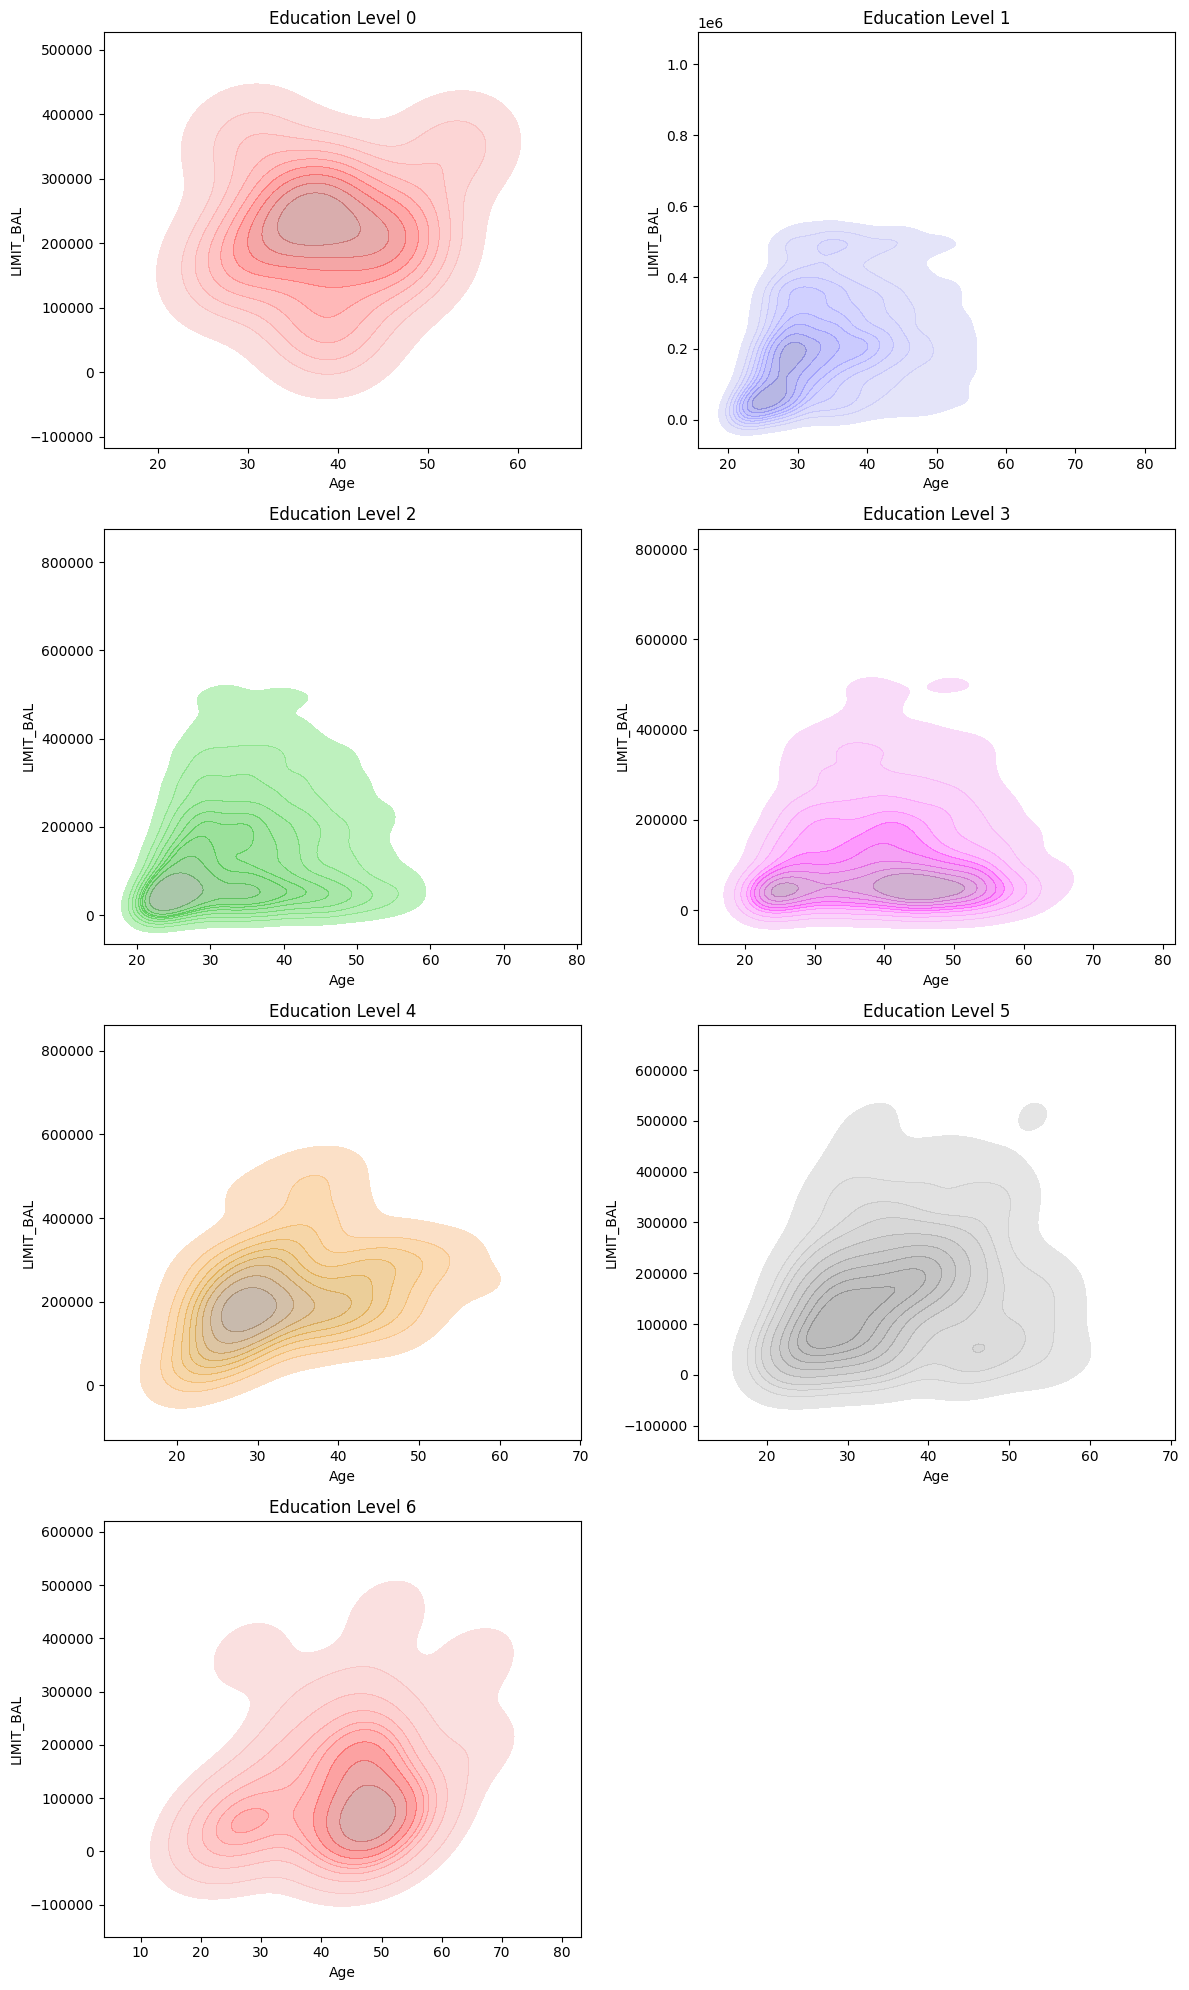

In [36]:
education_levels = sorted(new_data['education'].unique())
color_list = ['red', 'blue', 'green', 'purple', 'orange', 'black']

n = len(education_levels)
cols = 2 
rows = (n + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

for i, edu in enumerate(education_levels):
    subset = new_data[new_data['education'] == edu]
    color = color_list[i % len(color_list)]
    
    sns.kdeplot(
        x=subset['age'],
        y=subset['LIMIT_BAL'],
        fill=True,
        color=color,
        alpha=0.4,
        thresh=0.05,
        ax=axes[i]
    )
    axes[i].set_title(f"Education Level {edu}")
    axes[i].set_xlabel("Age")
    axes[i].set_ylabel("LIMIT_BAL")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<Axes: xlabel='next_month_default', ylabel='LIMIT_BAL'>

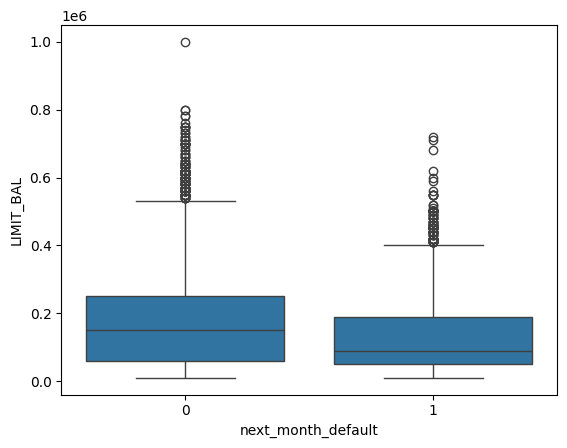

In [37]:
sns.boxplot(x='next_month_default', y='LIMIT_BAL', data=new_data)

<Axes: xlabel='next_month_default', ylabel='repayment_ration'>

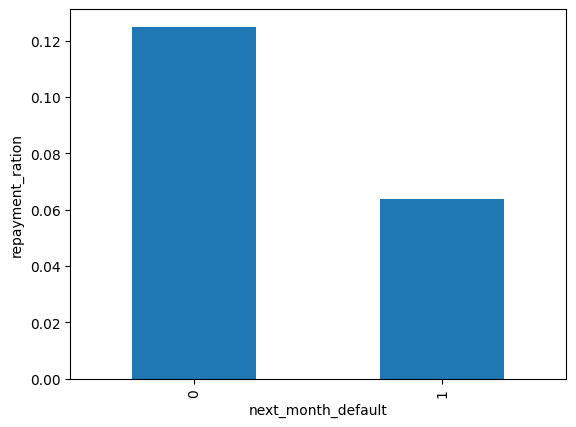

In [38]:
new_data.groupby('next_month_default')['repayment_ratio'].median().plot(kind="bar",ylabel="repayment_ration")

Customers with high credit limits and consistent repayment show low default risk.

<Axes: xlabel='next_month_default', ylabel='pay_0'>

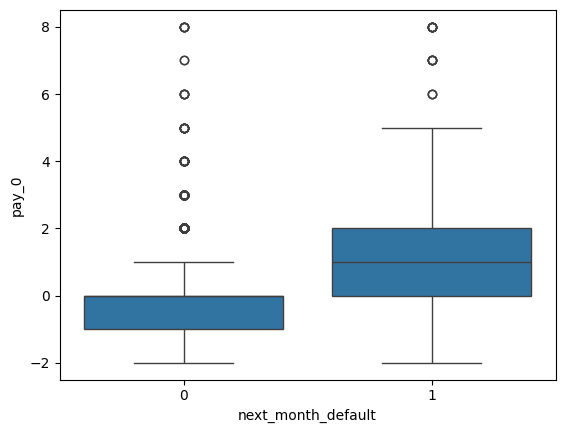

In [39]:
sns.boxplot(x='next_month_default', y='pay_0', data=new_data)

 Left Box — next_month_default = 0 (Non-Defaulters)
Median (horizontal line inside box): ≈ -1
⤷ Most customers paid in full on time.

Box (25th to 75th percentile): From -1 to 0
⤷ Indicates that most non-defaulters either paid in full or made at least a partial payment.

Whiskers (lines extending from box): From about -2 to 1
⤷ A few had no consumption, and some had a 1-month delay but still didn’t default.

Outliers (dots above whisker): Up to 8
⤷ These are rare cases where customers delayed up to 8 months, but surprisingly still didn't default.

Right Box — next_month_default = 1 (Defaulters)
Median: ≈ 1
⤷ Majority of defaulters had at least 1-month overdue payment.

Box (25th to 75th percentile): From 0 to 2
⤷ Indicates that most defaulters were already delaying payments recently.

Whiskers: From about -2 to 5
⤷ Some paid fully (-1 or 0), but many had significant delays.

Outliers: Again reach up to 8
⤷ Severe delay behavior among some defaulters.





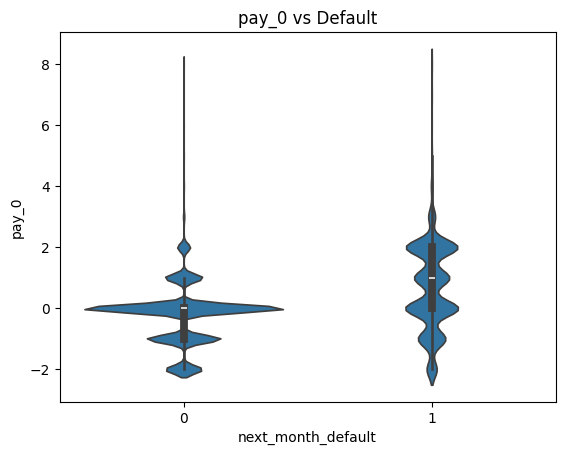

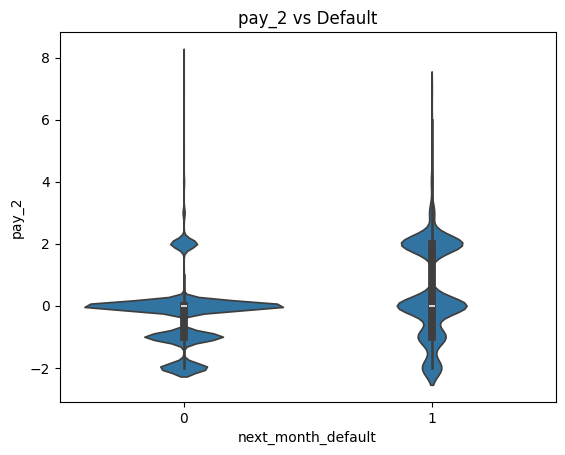

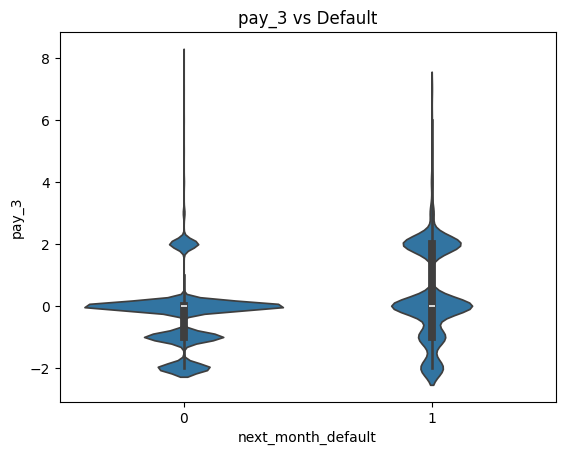

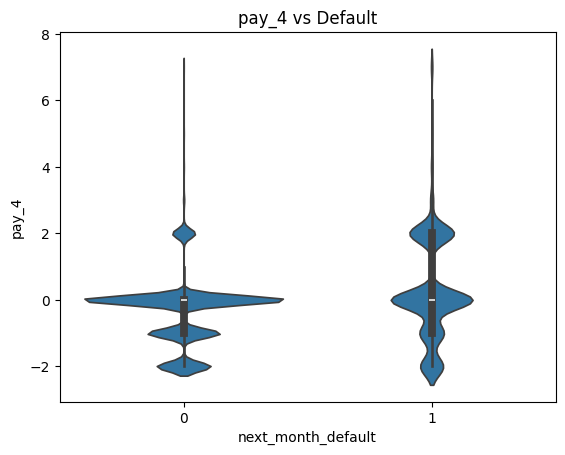

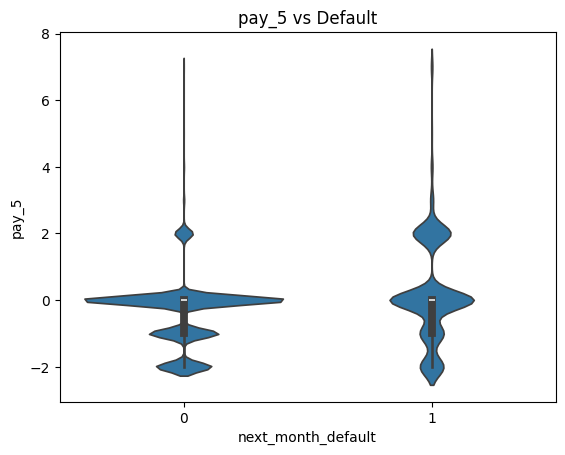

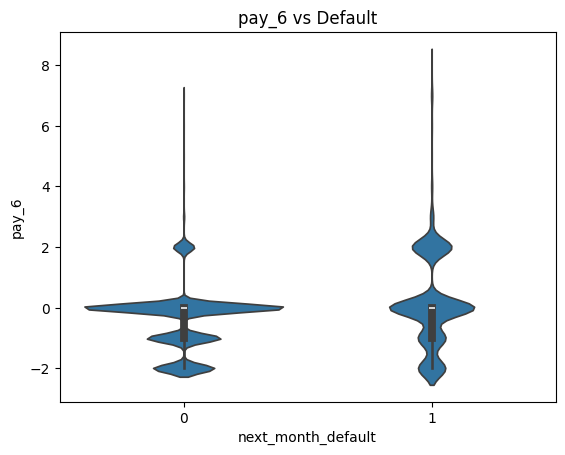

In [40]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
for col in pay_cols:
    sns.violinplot(x='next_month_default', y=col, data=data)
    plt.title(f'{col} vs Default')
    plt.show()


Defaulters tend to have higher values of pay_0, indicating delays or missed payments in the most recent month.

Non-defaulters cluster around pay_0 = 0, which indicates on-time payments.

pay_0 is one of the strongest indicators of default — it directly represents past delinquency.

The higher and more spread-out distribution for class 1 makes this a powerful predictive feature.

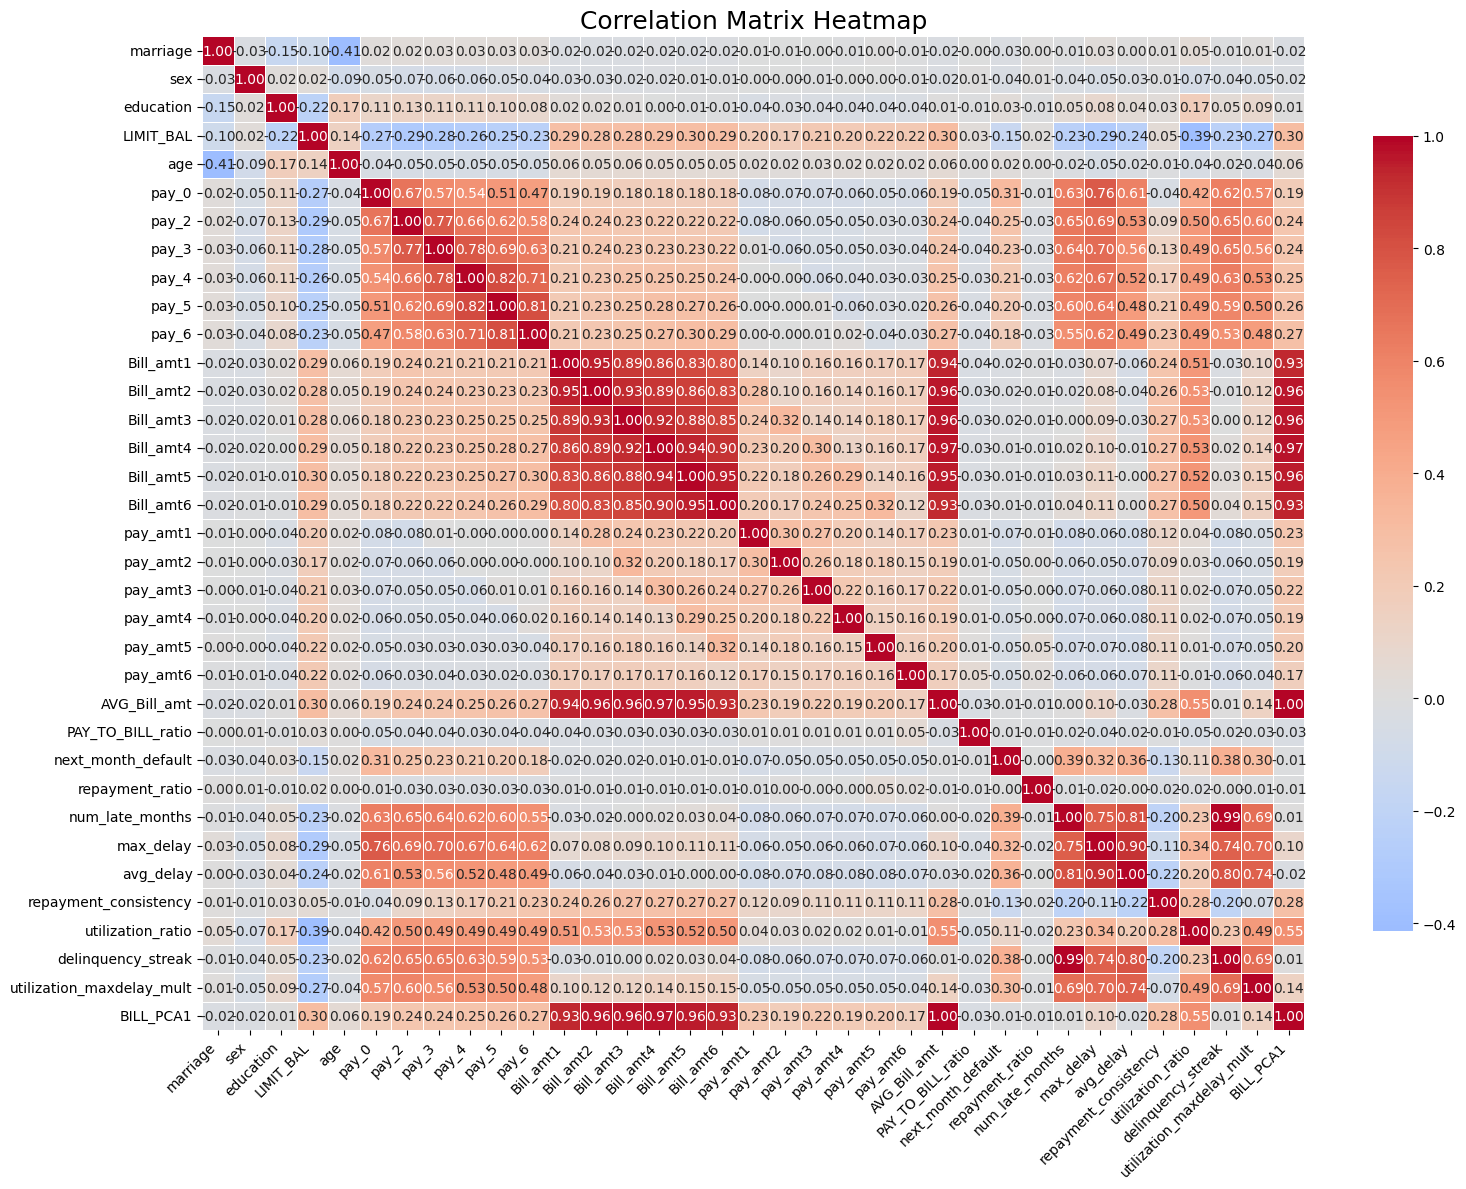

In [41]:
corr_matrix = new_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,            
    fmt=".2f",             
    cmap='coolwarm',      
    center=0,              
    linewidths=0.5,        
    cbar_kws={"shrink": 0.8} 
)

plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

some cloumns shows high co-relation

In [42]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features to drop:", to_drop)

Highly correlated features to drop: ['Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'AVG_Bill_amt', 'delinquency_streak', 'BILL_PCA1']


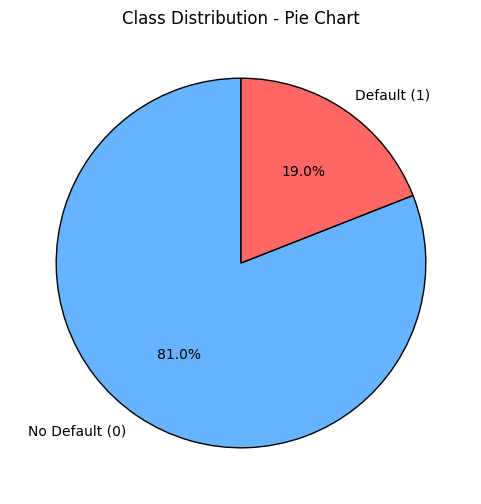

In [43]:
class_counts = new_data['next_month_default'].value_counts()
labels = ['No Default (0)', 'Default (1)']
colors = ['#66b3ff','#ff6666']

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title("Class Distribution - Pie Chart")
plt.show()

80.96% customers are non-defaulters,19.04% customers defaulted

Insight:

Strong class imbalance.

ML models may become biased toward predicting non-default unless balanced.

(Use SMOTE or adjust class_weight.)



<Axes: xlabel='next_month_default', ylabel='num_late_months'>

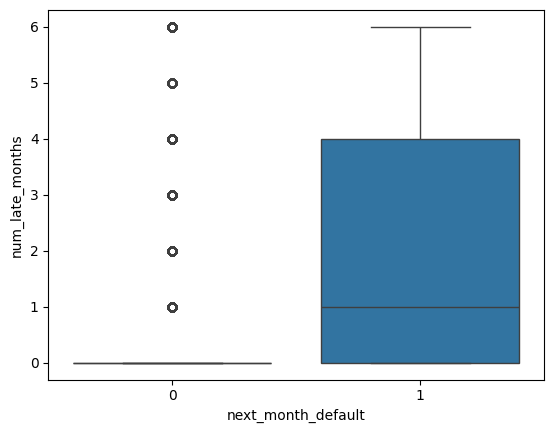

In [44]:
sns.boxplot(x='next_month_default', y='num_late_months', data=new_data)

Customers with multiple months of delayed payments (3 or more) showed significantly higher default rates. We engineered num_late_months, avg_delay, and max_delay to quantify repayment behavior

<Axes: xlabel='repayment_consistency', ylabel='Density'>

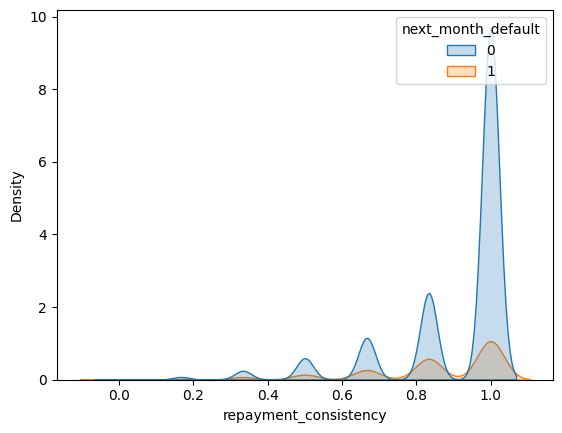

In [45]:
sns.kdeplot(data=new_data, x='repayment_consistency', hue='next_month_default', fill=True)

high repayment consistancy means less risk of default

<Axes: xlabel='next_month_default', ylabel='utilization_ratio'>

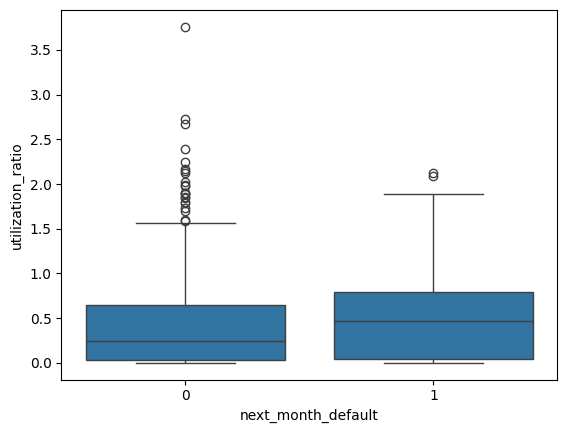

In [46]:
sns.boxplot(x='next_month_default', y='utilization_ratio', data=new_data)


The median utilization ratio is higher for defaulters (1) compared to non-defaulters (0).

Defaulters tend to have less extreme outliers, whereas non-defaulters have more instances with extremely high utilization ratios (>2.5).

A higher utilization_ratio (i.e., using more of the available credit) is positively correlated with higher default risk.

This could be a strong predictor feature for default classification.

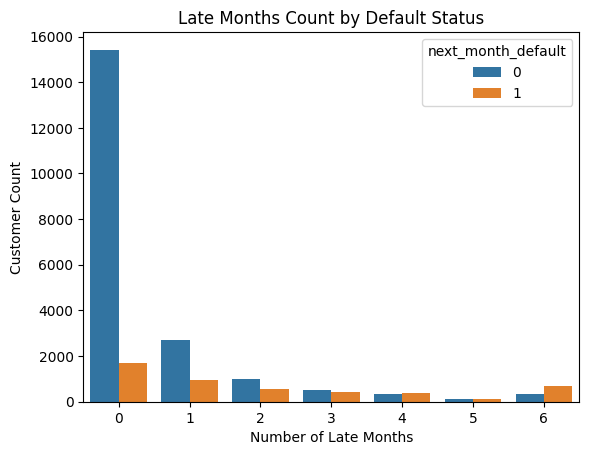

In [47]:
sns.countplot(x='num_late_months', hue='next_month_default', data=new_data)
plt.title("Late Months Count by Default Status")
plt.xlabel("Number of Late Months")
plt.ylabel("Customer Count")
plt.show()


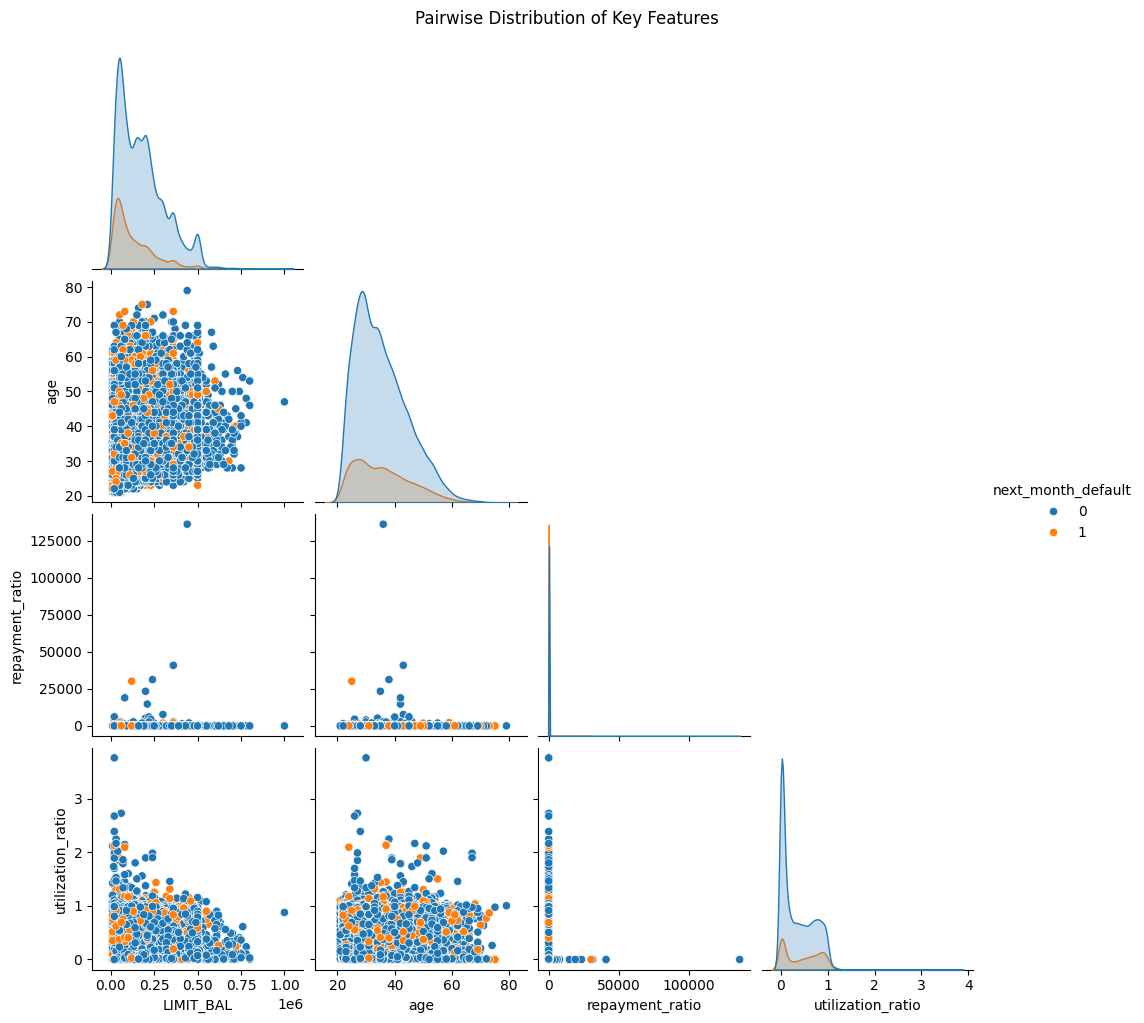

In [48]:
sns.pairplot(new_data, vars=['LIMIT_BAL', 'age', 'repayment_ratio', 'utilization_ratio'],
             hue='next_month_default', corner=True)
plt.suptitle("Pairwise Distribution of Key Features", y=1.02)
plt.show()


LIMIT_BAL and utilization_ratio show some negative correlation, which makes sense — higher limits generally lead to lower utilization ratios.

age is somewhat evenly distributed, though younger users seem more scattered.

Most users (default and non-default) have very low repayment ratios, with some clear outliers.

The scatterplots don’t show clear linear separability between classes.

However, the distribution plots (top diagonal) show that:

Defaulters have a slightly higher utilization and lower repayment.

age and LIMIT_BAL have subtle impact but aren’t highly discriminative alone.

Multivariate modeling will likely be more effective than relying on individual features.

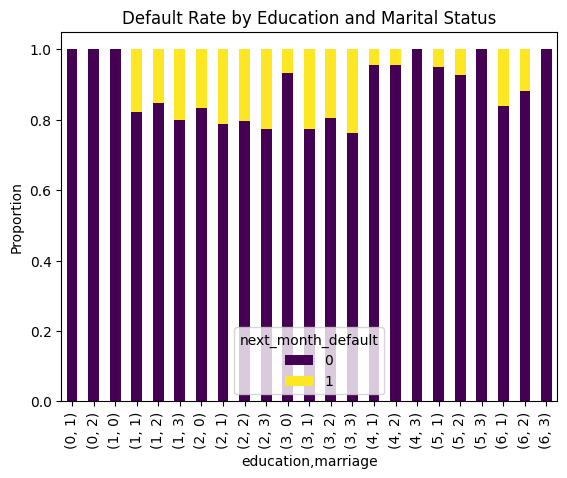

In [49]:
edu_mar = new_data.groupby(['education', 'marriage'])['next_month_default'].value_counts(normalize=True).unstack().fillna(0)
edu_mar.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Default Rate by Education and Marital Status")
plt.ylabel("Proportion")
plt.show()


Default rates vary across combinations of education level and marital status.

Some combinations like (2,2) or (3,2) have higher proportions of default (more yellow).

Sociodemographic factors (like education and marriage) do influence credit behavior.

These categorical feature combinations could be useful when one-hot encoded or target encoded in your model.

# FEATURE ENGG 

In [118]:
new_data.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default',
       'repayment_ratio', 'num_late_months', 'max_delay', 'avg_delay',
       'repayment_consistency', 'utilization_ratio', 'delinquency_streak',
       'utilization_maxdelay_mult', 'BILL_PCA1'],
      dtype='object')

In [119]:
to_drop = ['Bill_amt1', 'Bill_amt2','Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6','pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5',"num_late_months","max_delay"]


In [120]:
new_data.drop(columns=to_drop, inplace=True)
sub_data.drop(columns=to_drop, inplace=True)

In [121]:
new_data.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,repayment_ratio,avg_delay,repayment_consistency,utilization_ratio,delinquency_streak,utilization_maxdelay_mult,BILL_PCA1
0,2,0,2,60000,25.0,2,2,2,0,0,...,41511.50,0.03,0,0.031947,2.0,0.833333,0.691847,3,1.383694,-0.164869
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,2534.50,0.27,0,0.266246,0.0,0.500000,0.008742,0,0.000000,-1.573466
2,1,0,2,180000,63.0,0,0,0,0,0,...,50422.00,0.04,0,0.039850,0.0,1.000000,0.280119,0,0.000000,0.224638
3,1,1,2,210000,43.0,0,0,0,0,0,...,86229.50,0.04,0,0.035660,0.0,1.000000,0.410616,0,0.000000,1.539703
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,11814.33,0.72,0,0.723892,0.0,1.000000,0.042194,0,-0.084387,-1.222999


## handling outlier

In [122]:
def detect_outliers(col):
    q1 = new_data[col].quantile(0.25)
    q3 = new_data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return new_data[(new_data[col] < lower) | (new_data[col] > upper)]

outlier_columns = new_data.columns

for col in outlier_columns:
    outliers = detect_outliers(col)
    print(f"{col}: {len(outliers)} outliers")


marriage: 0 outliers
sex: 0 outliers
education: 413 outliers
LIMIT_BAL: 148 outliers
age: 217 outliers
pay_0: 2398 outliers
pay_2: 3460 outliers
pay_3: 3329 outliers
pay_4: 2774 outliers
pay_5: 2363 outliers
pay_6: 2457 outliers
pay_amt6: 2511 outliers
AVG_Bill_amt: 2158 outliers
PAY_TO_BILL_ratio: 829 outliers
next_month_default: 4807 outliers
repayment_ratio: 789 outliers
avg_delay: 87 outliers
repayment_consistency: 1843 outliers
utilization_ratio: 23 outliers
delinquency_streak: 2576 outliers
utilization_maxdelay_mult: 6809 outliers
BILL_PCA1: 2165 outliers


**outliers and thier meaning**
- LIMIT_BAL-> Outliers are real (wealthy clients), but can skew models
- age -> Very young/old are rare — may behave differently
- repayment ration -> Some repay more than their bill — unusual but not wrong
- utilization_ratio -> Spending more than limit indicates risk, but don't remove
- num_late_months -> More late months = strong signal of default
- max_delay / pay_0–pay_6 -> Delays >6 are rare and extreme, but carry strong meaning

In [123]:
def detect_outliers(col):
    q1 = sub_data[col].quantile(0.25)
    q3 = sub_data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return sub_data[(sub_data[col] < lower) | (sub_data[col] > upper)]

outlier_columns = sub_data.columns

for col in outlier_columns:
    outliers = detect_outliers(col)
    print(f"{col}: {len(outliers)} outliers")


Customer_ID: 0 outliers
marriage: 0 outliers
sex: 0 outliers
education: 84 outliers
LIMIT_BAL: 30 outliers
age: 35 outliers
pay_0: 496 outliers
pay_2: 674 outliers
pay_3: 663 outliers
pay_4: 572 outliers
pay_5: 516 outliers
pay_6: 486 outliers
pay_amt6: 492 outliers
AVG_Bill_amt: 477 outliers
PAY_TO_BILL_ratio: 160 outliers
repayment_ratio: 163 outliers
avg_delay: 10 outliers
repayment_consistency: 341 outliers
utilization_ratio: 3 outliers
delinquency_streak: 506 outliers
utilization_maxdelay_mult: 1245 outliers
BILL_PCA1: 477 outliers


In [124]:
def winsorize_column(series, lower=0.01, upper=0.99):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    lower_prop = (series < lower_bound).mean()
    upper_prop = (series > upper_bound).mean()
    return  winsorize(series, limits=(lower_prop, upper_prop))
    
outlier_cols = {
    'education': 'clip',  
    'LIMIT_BAL': 'winsorize',
    'age': 'winsorize',
    'pay_0': 'cap',
    'pay_2': 'cap',
    'pay_3': 'cap',
    'pay_4': 'cap',
    'pay_5': 'cap',
    'pay_6': 'cap',
    'BILL_PCA' : 'winsorize',
    'pay_amt6': 'winsorize',
    'AVG_Bill_amt': 'winsorize',
    'PAY_TO_BILL_ratio': 'clip_max',
    'repayment_ratio': 'clip_max',
    'avg_delay': 'winsorize',
    'repayment_consistency': 'winsorize',
    'utilization_ratio': 'clip_max',
    'delinquency_streak': 'winsorize',
    'utilization_maxdelay_mult': 'winsorize'
}

def handle_outliers(df):
    for col, method in outlier_cols.items():
        if col not in df.columns:
            continue

        if method == 'winsorize':
            df[col] = winsorize_column(df[col], lower=0.01, upper=0.99)

        elif method == 'clip':
            df[col] = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.99))

        elif method == 'clip_max':
            upper = df[col].quantile(0.99)
            df[col] = df[col].clip(upper=upper)

        elif method == 'cap': 
            df[col] = df[col].apply(lambda x: min(x, 6))

    return df

new_data = handle_outliers(new_data)
sub_data = handle_outliers(sub_data)

## handling class imbalance

In [125]:
new_data['next_month_default'].value_counts(normalize=True)

next_month_default
0    0.809601
1    0.190399
Name: proportion, dtype: float64

In [126]:
X = new_data.drop(columns=['next_month_default'])
y = new_data['next_month_default']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# MODEL_TRAINING

c:\Users\Predator\miniconda3\envs\gpu_env\lib\site-packages\xgboost\core.py:158: UserWarning: [15:30:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4095
           1       0.56      0.39      0.46       955

    accuracy                           0.83      5050
   macro avg       0.72      0.66      0.68      5050
weighted avg       0.81      0.83      0.81      5050

F2 Score: 0.41340782122905034
ROC AUC Score: 0.7564814708270206


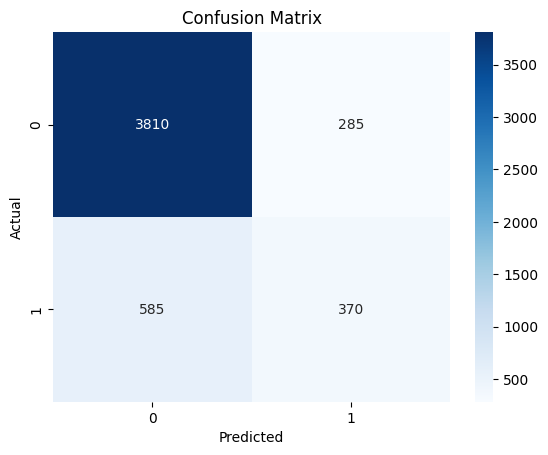

In [61]:
# 5. Train XGBoost model
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
y_proba = model_xgb.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

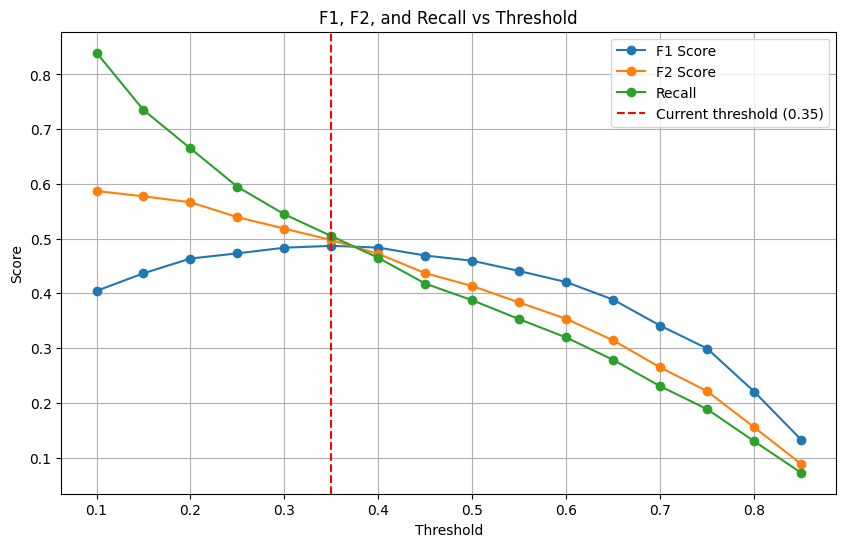

In [62]:
thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []
f2_scores = []
recalls = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))
    f2_scores.append(fbeta_score(y_test, y_pred_thresh, beta=2))
    recalls.append(recall_score(y_test, y_pred_thresh))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, f2_scores, label='F2 Score', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.axvline(x=0.35, color='red', linestyle='--', label='Current threshold (0.35)')
plt.title("F1, F2, and Recall vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()


In [63]:
threshold = 0.34
y_pred_thresh = (y_proba >= threshold).astype(int)

print("F2 Score @ 0.34:", fbeta_score(y_test, y_pred_thresh, beta=2))
print(classification_report(y_test, y_pred_thresh))


F2 Score @ 0.34: 0.5020491803278688
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4095
           1       0.46      0.51      0.49       955

    accuracy                           0.80      5050
   macro avg       0.67      0.69      0.68      5050
weighted avg       0.80      0.80      0.80      5050



In [64]:
model_lgb = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42
)
model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)
y_proba_lgb = model_lgb.predict_proba(X_test)[:, 1]
print("\nLightGBM:")
print(classification_report(y_test, y_pred_lgb))
print("F2 Score:", fbeta_score(y_test, y_pred_lgb, beta=2))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lgb))

[LightGBM] [Info] Number of positive: 16345, number of negative: 16345
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2803
[LightGBM] [Info] Number of data points in the train set: 32690, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [65]:
model_cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=4,
    verbose=0,
    random_state=42
)
model_cat.fit(X_train, y_train)
y_pred_cat = model_cat.predict(X_test)
y_proba_cat = model_cat.predict_proba(X_test)[:, 1]
print("\nCatBoost:")
print(classification_report(y_test, y_pred_cat))
print("F2 Score:", fbeta_score(y_test, y_pred_cat, beta=2))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_cat))



CatBoost:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4095
           1       0.58      0.44      0.50       955

    accuracy                           0.83      5050
   macro avg       0.73      0.68      0.70      5050
weighted avg       0.82      0.83      0.82      5050

F2 Score: 0.4594535037461437
ROC AUC Score: 0.7810859878922707


In [66]:
# HistGradientBoosting
model_hist = HistGradientBoostingClassifier(
    max_iter=300,
    learning_rate=0.05,
    max_depth=4,
    l2_regularization=1.0,
    random_state=42
)
model_hist.fit(X_train, y_train)
y_pred_hist = model_hist.predict(X_test)
y_proba_hist = model_hist.predict_proba(X_test)[:, 1]
print("\nHistGradientBoosting:")
print(classification_report(y_test, y_pred_hist))
print("F2 Score:", fbeta_score(y_test, y_pred_hist, beta=2))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_hist))


HistGradientBoosting:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4095
           1       0.57      0.43      0.49       955

    accuracy                           0.83      5050
   macro avg       0.72      0.68      0.70      5050
weighted avg       0.82      0.83      0.82      5050

F2 Score: 0.45404452281243113
ROC AUC Score: 0.7818703693049244


In [82]:
# Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced'),
    'RandomForest': RandomForestClassifier(class_weight='balanced'),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'NaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    
}

# Train and evaluate
selected_models = {}
for name, model in models.items():
    print(f"\n{name} Model:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    print("F2 Score:", f2)
    print(classification_report(y_test, y_pred))
    selected_models[name] = model


LogisticRegression Model:
F2 Score: 0.5219864698646987
              precision    recall  f1-score   support

           0       0.88      0.51      0.65      4095
           1       0.25      0.71      0.37       955

    accuracy                           0.55      5050
   macro avg       0.57      0.61      0.51      5050
weighted avg       0.76      0.55      0.60      5050


DecisionTree Model:
F2 Score: 0.39362131610819545
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4095
           1       0.34      0.41      0.37       955

    accuracy                           0.74      5050
   macro avg       0.60      0.61      0.60      5050
weighted avg       0.76      0.74      0.75      5050


RandomForest Model:
F2 Score: 0.450361604207758
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4095
           1       0.55      0.43      0.48       955

    accuracy              

## FINE-TUNING SELECTED MODELS

In [68]:
f2_scorer = make_scorer(fbeta_score, beta=2)

In [69]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

grid_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid_xgb, scoring=f2_scorer, cv=3, verbose=1, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("\n XGBoost (Fine-Tuned) - Best Parameters:")
print(grid_xgb.best_params_)
print("\n Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("F2 Score:", fbeta_score(y_test, y_pred_xgb, beta=2))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


c:\Users\Predator\miniconda3\envs\gpu_env\lib\site-packages\xgboost\core.py:158: UserWarning: [15:39:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost (Fine-Tuned) - Best Parameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}

 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4095
           1       0.46      0.56      0.50       955

    accuracy                           0.79      5050
   macro avg       0.67      0.70      0.69      5050
weighted avg       0.81      0.79      0.80      5050

F2 Score: 0.5338149709010636
ROC AUC Score: 0.780199835068945


In [72]:
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 1.0]
}
model_lgb = LGBMClassifier(class_weight='balanced', random_state=42)
grid_lgb = GridSearchCV(estimator=model_lgb, param_grid=param_grid_lgb, scoring=f2_scorer, cv=3, verbose=1, n_jobs=-1)
grid_lgb.fit(X_train, y_train)
best_lgb = grid_lgb.best_estimator_
y_pred_lgb = best_lgb.predict(X_test)
y_proba_lgb = best_lgb.predict_proba(X_test)[:, 1]
print("\n LightGBM (Fine-Tuned) - Best Parameters:")
print(grid_lgb.best_params_)
print("\n Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("F2 Score:", fbeta_score(y_test, y_pred_lgb, beta=2))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lgb))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[LightGBM] [Info] Number of positive: 16345, number of negative: 16345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2803
[LightGBM] [Info] Number of data points in the train set: 32690, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [71]:
param_grid_cat = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 4, 5],
    'l2_leaf_reg': [1, 3, 5]
}
grid_cat = GridSearchCV(estimator=model_cat, param_grid=param_grid_cat, scoring=f2_scorer, cv=3, verbose=1, n_jobs=-1)
grid_cat.fit(X_train, y_train)
best_cat = grid_cat.best_estimator_
y_pred_cat = best_cat.predict(X_test)
y_proba_cat = best_cat.predict_proba(X_test)[:, 1]
print("\n CatBoost (Fine-Tuned) - Best Parameters:")
print(grid_cat.best_params_)
print("\n Classification Report:")
print(classification_report(y_test, y_pred_cat))
print("F2 Score:", fbeta_score(y_test, y_pred_cat, beta=2))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_cat))


Fitting 3 folds for each of 81 candidates, totalling 243 fits

 CatBoost (Fine-Tuned) - Best Parameters:
{'depth': 3, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.01}

 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      4095
           1       0.39      0.64      0.49       955

    accuracy                           0.75      5050
   macro avg       0.65      0.71      0.66      5050
weighted avg       0.81      0.75      0.77      5050

F2 Score: 0.5705510052122116
ROC AUC Score: 0.7454730261012983


In [73]:
param_grid_hist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'l2_regularization': [0.0, 1.0, 3.0],
    'max_leaf_nodes': [15, 31, 63]
}
grid_hist = GridSearchCV(estimator=model_hist, param_grid=param_grid_hist, scoring=f2_scorer, cv=3, verbose=1, n_jobs=-1)
grid_hist.fit(X_train, y_train)
best_hist = grid_hist.best_estimator_
y_pred_hist = best_hist.predict(X_test)
y_proba_hist = best_hist.predict_proba(X_test)[:, 1]

print("\n HistGradientBoosting (Fine-Tuned) - Best Parameters:")
print(grid_hist.best_params_)
print("\n Classification Report:")
print(classification_report(y_test, y_pred_hist))
print("F2 Score:", fbeta_score(y_test, y_pred_hist, beta=2))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_hist))


Fitting 3 folds for each of 243 candidates, totalling 729 fits

 HistGradientBoosting (Fine-Tuned) - Best Parameters:
{'l2_regularization': 3.0, 'learning_rate': 0.01, 'max_depth': 3, 'max_iter': 100, 'max_leaf_nodes': 15}

 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      4095
           1       0.40      0.64      0.49       955

    accuracy                           0.75      5050
   macro avg       0.65      0.71      0.66      5050
weighted avg       0.81      0.75      0.77      5050

F2 Score: 0.5699626865671641
ROC AUC Score: 0.756542584814836


In [131]:

voting_ensemble = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('cat', best_cat),
        ('gb', selected_models["GradientBoosting"])
    ],
    voting='soft'
)
voting_ensemble.fit(X_train, y_train)
y_pred_ensemble = voting_ensemble.predict(X_test)
y_proba_ensemble = voting_ensemble.predict_proba(X_test)[:, 1]

print("\n✅ Voting Ensemble (XGB +CatBoost+ GradientBoosting):")
print(classification_report(y_test, y_pred_ensemble))
print("F2 Score:", fbeta_score(y_test, y_pred_ensemble, beta=2))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_ensemble))

c:\Users\Predator\miniconda3\envs\gpu_env\lib\site-packages\xgboost\core.py:158: UserWarning: [18:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Voting Ensemble (XGB +CatBoost+ GradientBoosting):
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4095
           1       0.47      0.55      0.51       955

    accuracy                           0.80      5050
   macro avg       0.68      0.70      0.69      5050
weighted avg       0.81      0.80      0.80      5050

F2 Score: 0.5331179321486268
ROC AUC Score: 0.7761283393744127


# SUBMISSION

In [129]:
customer_ID = sub_data["Customer_ID"]
sub_data.drop("Customer_ID", axis=1, inplace=True)

In [130]:
sub_pred = voting_ensemble.predict(sub_data)

# Create submission DataFrame
submission = pd.DataFrame({
    'Customer_ID': customer_ID, 
    'next_month_default': sub_pred
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("✅ Submission file saved as submission.csv")

✅ Submission file saved as submission.csv
